<a href="https://colab.research.google.com/github/tosuntore/vini_pinzon_portfolio/blob/main/Analisando_os_Dados_do_Airbnb_Twin_Cities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Twin Cities*

O [Airbnb](https://www.airbnb.com.br/) já é considerado a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes às Twin Cities, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/united-states/mn/twin-cities-msa/2022-09-16/visualisations/listings.csv')
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

## Análise dos Dados


**Dicionário das variáveis**


* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2441,"Cozy Artist’s Abode, NE Mpls - Pets, Wifi, Rok...",2680,Emily,NaN,Hennepin,45.00862,-93.23424,Entire home/apt,98,28,298,2022-05-01,1.90,2,166,19,STR-111974
1,4534,"Charming, 1 or 2BR + private bath, near downtown",5811,Rachel,NaN,Hennepin,44.94566,-93.35721,Private room,58,2,205,2022-09-05,1.37,2,245,23,NaN
2,27319,"Parks, Lakes, Downtown, Light rail",117283,Keith,NaN,Hennepin,44.92016,-93.22899,Private room,64,2,181,2022-08-07,1.24,2,346,4,Exempt
3,82439,Rest and Rehearsal Space,117283,Keith,NaN,Hennepin,44.91995,-93.23011,Private room,64,2,35,2022-08-28,0.26,2,346,10,Exempt
4,101034,★ParkFront ★ Walk 2 Downtown ★ Bike Score 98★,529956,MPLSvr Angie,NaN,Hennepin,44.98712,-93.25188,Entire home/apt,167,30,112,2020-01-29,0.90,4,210,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame
print('Volume do dataframe (linhas x colunas):', df.shape),
df['host_id'] = df['host_id'].astype(str) # conversao de "host_id" para string pois não se utilizará da natureza contábil desses números 
print('Tipos das varíaveis:', display(df.dtypes))


Volume do dataframe (linhas x colunas): (4156, 18)


id                                  int64
name                               object
host_id                            object
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Tipos das varíaveis: None


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
valores_ausentes = (df.isnull().sum() / df.shape[0] * 100).sort_values(ascending = False),
print ('Pode-se perceber que o AirBnB não discrimina as localidades por bairro (neighbourhood_group) nas Twin Cities:'),
print(valores_ausentes)
print('                                    *valores em porcentagem'),
df.drop('neighbourhood_group', axis=1, inplace=True) # Sem valores nao tem porque manter

Pode-se perceber que o AirBnB não discrimina as localidades por bairro (neighbourhood_group) nas Twin Cities:
(neighbourhood_group               100.000000
license                            68.238691
reviews_per_month                  16.385948
last_review                        16.385948
minimum_nights                      0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
id                                  0.000000
name                                0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_name                           0.000000
host_id                             0.000000
price                               0.000000
dtype: float64,)
                                    *valores em porcentagem


### **Q3. Qual o tipo de distribuição das variáveis?** 

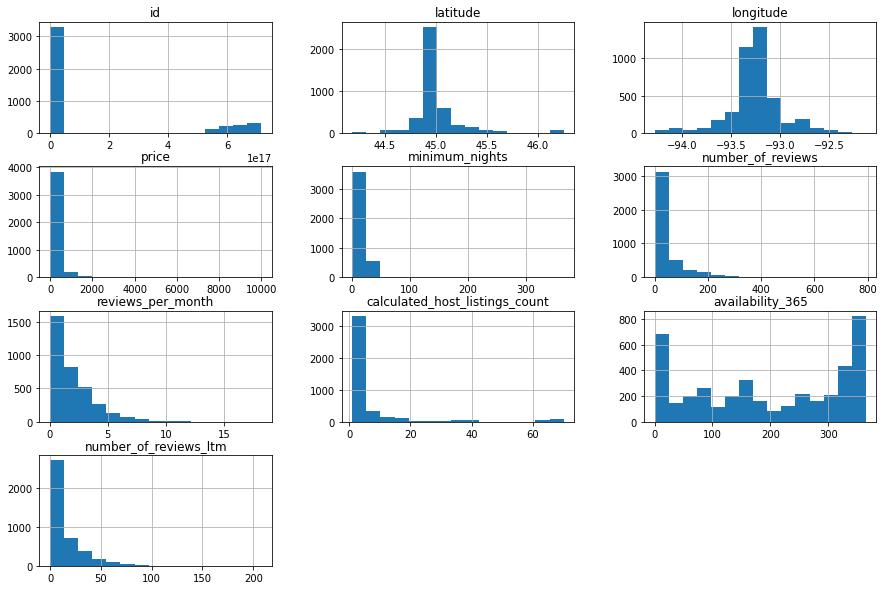

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

In [7]:
print('a partir do histograma, nota-se que "preço" e "noites mínimas" contam com outliers que dificultam a leitura.'),
print('Percebe-se que os valores máximos estão muito acima da média:')
df[['price', 'minimum_nights']].describe()

a partir do histograma, nota-se que "preço" e "noites mínimas" contam com outliers que dificultam a leitura.
Percebe-se que os valores máximos estão muito acima da média:


,price,minimum_nights
count,4156.000000,4156.000000
mean,258.909047,7.494706
std,481.773879,20.451798
min,0.000000,1.000000
25%,85.000000,1.000000
50%,135.000000,2.000000
75%,241.000000,4.000000
max,10000.000000,365.000000


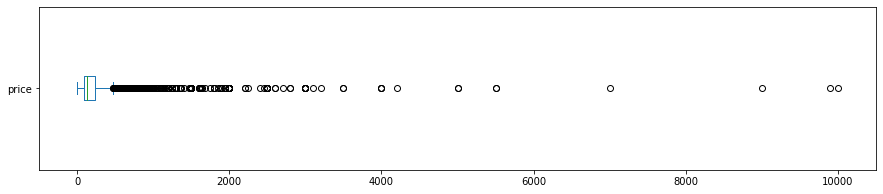

Há apenas 40 em valores acima de 2000 que repesentam 0.9624639076034648 do total de ocorrências


In [8]:
outliers_price = (format(len(df[df.price > 2000])))
outliers_price_p = (format((len(df[df.price > 2000]) / df.shape[0])*100))
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

print('Há apenas', outliers_price, 'em valores acima de 2000', 'que repesentam', outliers_price_p, 'do total de ocorrências')

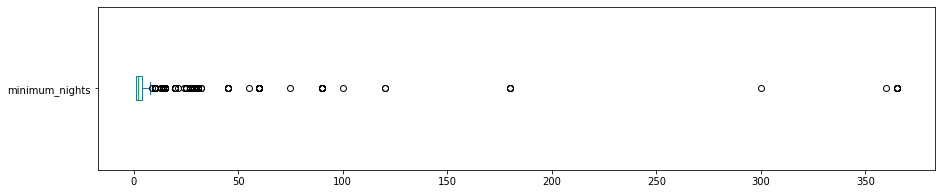

Há apenas 40 ocorrências acima de 50 noites, que repesentam 0.9624639076034648


In [9]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()
outliers_nights = (format(len(df[df.minimum_nights > 50])))
outliers_nights_p = (format((len(df[df.minimum_nights > 50]) / df.shape[0])*100))


print('Há apenas', outliers_nights, 'ocorrências acima de 50 noites,', 'que repesentam', outliers_nights_p)

Após "limpeza" de valores muito acima da média, temos os histogramas atualizados:


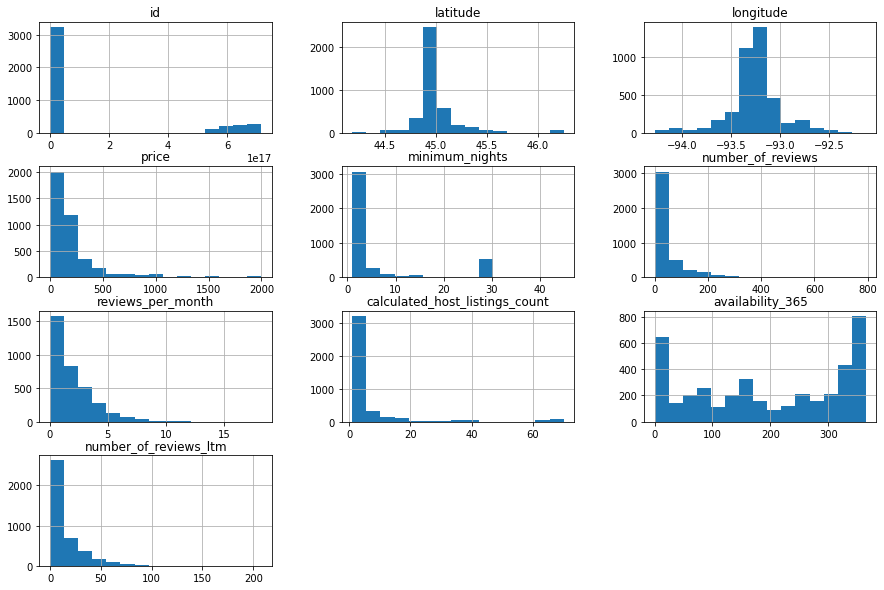

In [10]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 2000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 50].index, axis=0, inplace=True)

print('Após "limpeza" de valores muito acima da média, temos os histogramas atualizados:'),
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [12]:
# ver a média da coluna `price``
média_price_clean = df_clean['price'].mean()
print('A limpeza dos dados alterou a média do valor da diária apresentada anteriormente para', média_price_clean)

A limpeza dos dados alterou a média do valor da diária apresentada anteriormente para 226.20554329163602


### **Q4. Qual a correlação existente entre as variáveis**

In [15]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display (corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.079318,-0.172919,-0.132431,-0.055967,-0.151534
minimum_nights,-0.079318,1.000000,-0.157035,-0.280771,0.044754,0.001466
number_of_reviews,-0.172919,-0.157035,1.000000,0.541084,-0.082723,-0.007139
reviews_per_month,-0.132431,-0.280771,0.541084,1.000000,-0.137177,0.034040
calculated_host_listings_count,-0.055967,0.044754,-0.082723,-0.137177,1.000000,0.197766
availability_365,-0.151534,0.001466,-0.007139,0.034040,0.197766,1.000000


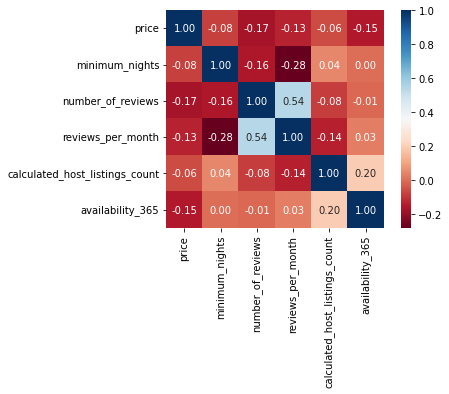

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

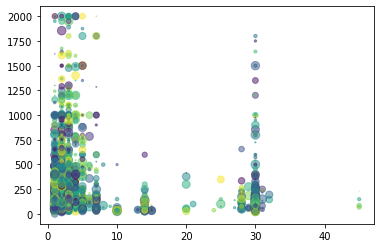

In [29]:
#nenhum dos valores apresentados no heatmap gerou algum insight para correlação.
#explorar mais a fundo a relação entre preço e noites mínimas
import numpy as np
N = 4077
x = df_clean['minimum_nights']
y = df_clean['price']  
colors = np.random.rand(N)
area = np.pi * (5 * np.random.rand(N))**2
plt.scatter(x, y, s=area, c=colors, alpha=0.5)

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean['room_type'].value_counts()

Entire home/apt    2979
Private room       1079
Hotel room           11
Shared room           8
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean['room_type'].value_counts() / df_clean.shape[0] * 100

Entire home/apt    73.068433
Private room       26.465538
Hotel room          0.269806
Shared room         0.196223
Name: room_type, dtype: float64

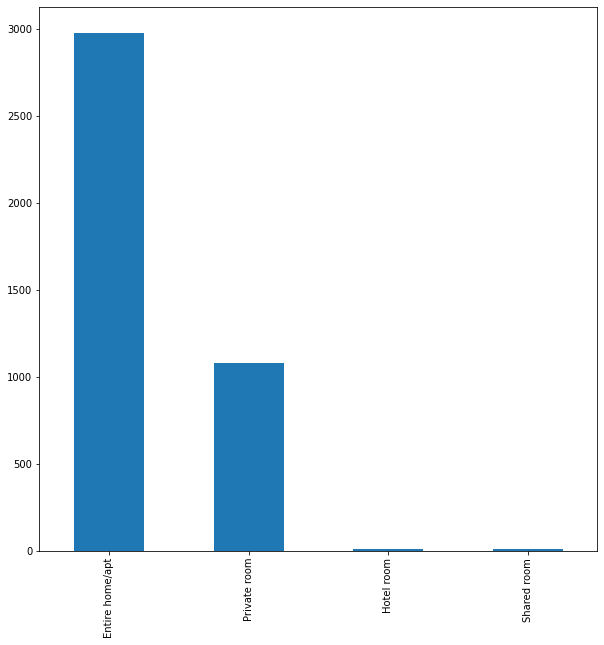

In [ ]:
df_clean['room_type'].value_counts().plot(kind='bar', figsize=(10,10));

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
#antes checar bairros com poucos imóveis para analisar ptenciais outliers
df_clean['neighbourhood'].value_counts()

Hennepin      2072
Ramsey         724
Dakota         198
Washington     187
Anoka          160
Chisago        112
Wright         111
Carver          85
Pierce          84
Sherburne       83
Mille Lacs      81
St. Croix       68
Scott           58
Le Sueur        26
Isanti          24
Sibley           4
Name: neighbourhood, dtype: int64

In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10] #único bairro com número baixo de entradas não aprece entre os maiores valores

neighbourhood
Carver        526.882353
Washington    328.588235
Mille Lacs    301.888889
Anoka         287.081250
Le Sueur      273.346154
Scott         262.051724
Pierce        259.750000
Dakota        256.419192
St. Croix     234.279412
Isanti        219.000000
Name: price, dtype: float64

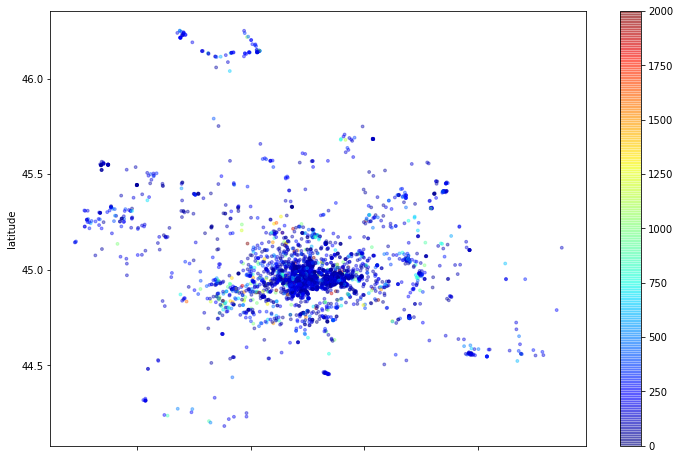

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean['minimum_nights'].mean()

6.132450331125828

## Conclusões




 ## TODOS OS CAMINHOS LEVAM ÀS TWIN CITIES
  As cidades de Saint Paul e Minneapolis fromam a região metropolitana conhecida como "Twin Ciites", ou "Cidades Gêmeas", localizada no estado americano do Minnesota. <H/>

  As belezas naturais da região dos grandes lagos e da nascente do rio Mississippi trazem cerca de 10 milhões de turistas por ano aos parques naturais do Minnesota. 
  
  A região das Twin Cities também é origem das gigantes 3M e Target e sede global da Cargill, trazendo um constate fluxo de viajantes a negócios, além de possuir times nas grandes ligas dos principais esportes americanos. 

  ## A HOSPITALIDADE DO NORTE
  Analisando a média de preço por vizinhança, percebe-se que, os preços mais altos encontram-se nos condatos de Carver, Washington, Mille Lacs, mais afastados das regiões urbanas, pois são visados por turistas que buscam conforto e infraestrutura para estar em meio à natureza.
  
  Já o condato de Hannepin, região central da cidade, possui a maior quatidade de quartos disponpiveis - em conta de sua densidade populacional - e a menor média de preço, pois é mais visado por visitante a negócios, que buscam mais praticidade. 

  Pode-se perceber também na relação entre noites mínimas e preço que os imóveis mais caros são alugados, em sua maioria, por menos de 10 dias. Quando a estadia passa a marca de 10 dias, sempre é fechado o mês, com 30 dias de aluguel.  

